In [14]:

import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
%matplotlib inline
from pandas import Series
from pandas import DataFrame
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

from pylab import rcParams
import scipy as sp
import seaborn as sns
import xgboost as xgb

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import sklearn
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import neighbors

from sklearn.preprocessing import scale
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer

from sklearn.externals import joblib

from collections import Counter
from sklearn import datasets

from IPython.display import Image
from IPython.core.display import HTML




### Here are the main steps you will go through:
    Look at the big picture. 
    Get the data. 
    Discover and visualize the data to gain insights. 
    Prepare the data for Machine Learning algorithms. 
    Select a model and train it. 
    Fine-tune your model. 
    Present your solution. 
    Launch, monitor, and maintain your system.

### Project overview
    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
    
### Select a Performance Measure

### Check the Assumptions

In [32]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
#read in train data
train=pd.read_csv('train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [13]:
a=train.shape
b=test.shape
print("train's shape",a)
print("test's shape",b)

train's shape (1460, 81)
test's shape (1459, 80)


In [4]:
#read in test data
test=pd.read_csv("test.csv")
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  
4         NaN       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [5]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

### Data fields
Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

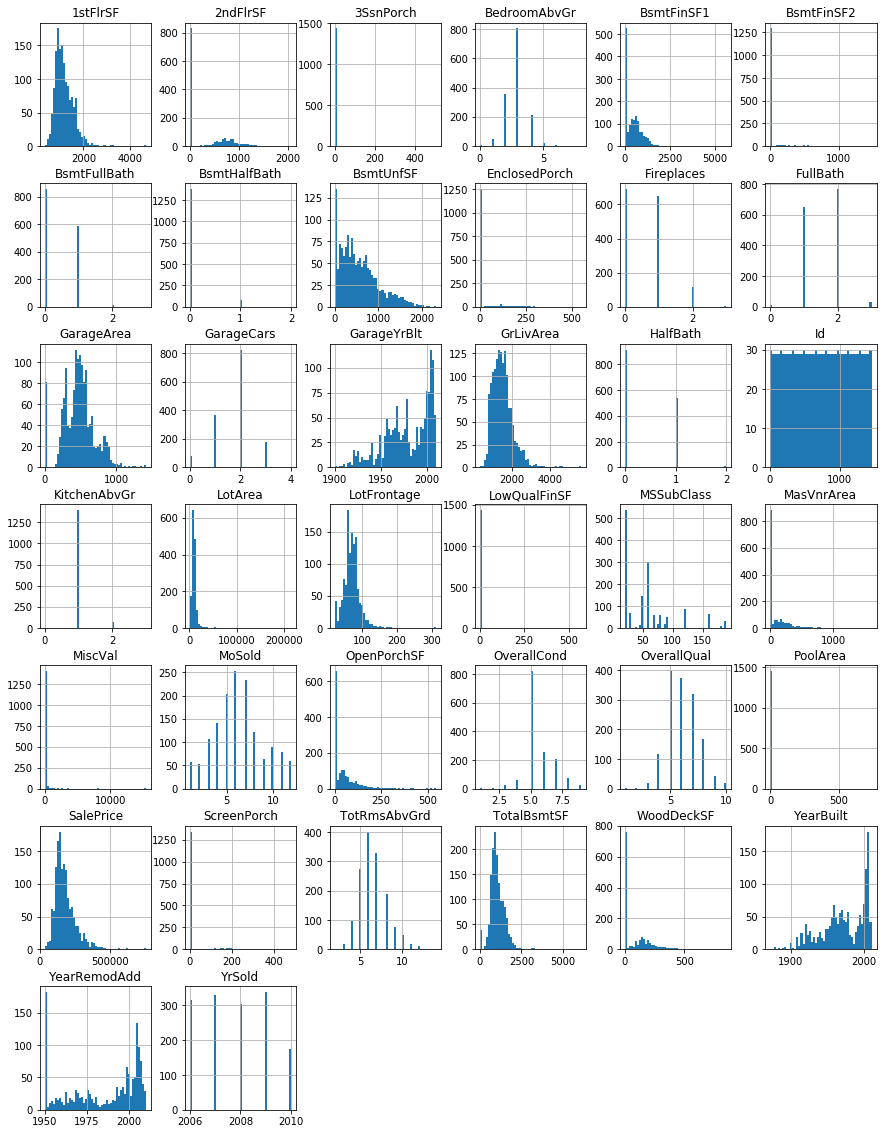

In [9]:
train.hist(bins=50,figsize=(15,20))

plt.show()

In [16]:
### Create a validation set
    #you can use from sklearn.model_selection "train_test_split" for random sampling if you have a large dataset
    # but you run the risk of introducing a significant sampling bias.
    # We will assume that we are told that median income is a very important attribute, thus we will make new feature
    # called income_category to help split and shuffle the data to make sure we have adequate sampling for the different
    #income categories
    
#split the training and testing data based OverallCond
#from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(train, train["OverallQual"]):
    strat_train_set = train.loc[train_index]
    strat_validation_set = train.loc[test_index]

In [17]:
#Lets look at the proportion of data allocated to each income category for the training set
strat_train_set.OverallQual.value_counts()/len(strat_train_set)*100

5     27.226027
6     25.599315
7     21.832192
8     11.558219
4      7.962329
9      2.910959
3      1.369863
10     1.198630
2      0.171233
1      0.171233
Name: OverallQual, dtype: float64

In [18]:
#Lets look at the proportion of data allocated to each income category for the validation set
strat_validation_set.OverallQual.value_counts()/len(strat_validation_set)*100

5     27.054795
6     25.684932
7     21.917808
8     11.301370
4      7.876712
9      3.082192
10     1.369863
3      1.369863
2      0.342466
Name: OverallQual, dtype: float64

In [19]:
#Lets look at the proportion of data allocated to each income category for the original training set
train.OverallQual.value_counts()/len(train)*100

5     27.191781
6     25.616438
7     21.849315
8     11.506849
4      7.945205
9      2.945205
3      1.369863
10     1.232877
2      0.205479
1      0.136986
Name: OverallQual, dtype: float64

In [34]:
#lets separate out the categorical features
cat_attrib=strat_train_set.select_dtypes(include=['object'])
cat_attrib.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
825        RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
948        RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
188        RL   Pave   NaN      Reg         Bnk    AllPub    Inside       Gtl   
1059       RL   Pave   NaN      IR1         HLS    AllPub    Corner       Mod   
667        RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
825       NridgHt       PosN       PosN     1Fam     1Story       Hip   
948       CollgCr       Norm       Norm     1Fam     2Story     Gable   
188       SawyerW      Feedr       Norm   Duplex     SFoyer     Gable   
1059      Crawfor       Norm       Norm     1Fam     1.5Fin     Gable   
667       SawyerW       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
825   CompShg     CemntBd     CmentBd    BrkFace        Ex        TA   
948   CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
188   CompShg     Plywood     Plywood      Stone        TA        TA   
1059  CompShg     MetalSd     MetalSd    BrkFace        TA        TA   
667   CompShg     HdBoard     HdBoard    BrkFace        TA        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
825       PConc       Ex       TA           Av          GLQ          Unf   
948       PConc       Gd       TA          NaN          Unf          Unf   
188      CBlock       Gd       TA           Av          GLQ          Unf   
1059     CBlock       TA       TA           Mn          Rec          LwQ   
667       PConc       Gd       TA           No          GLQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
825     GasA        Ex          Y      SBrkr          Ex        Typ   
948     GasA        Ex          Y      SBrkr          Gd        Typ   
188     GasA        TA          Y      SBrkr          TA        Typ   
1059    GasA        TA          Y      SBrkr          TA        Typ   
667     GasA        Ex          Y      SBrkr          Gd        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
825           Gd     Attchd          Fin         TA         TA          Y   
948           TA     Attchd          RFn         TA         TA          Y   
188           TA     Detchd          Unf         TA         TA          Y   
1059          Gd     Detchd          Unf         TA         Fa          Y   
667           Fa     Attchd          RFn         TA         TA          Y   

     PoolQC Fence MiscFeature SaleType SaleCondition  
825     NaN   NaN         NaN      New       Partial  
948     NaN   NaN         NaN       WD        Normal  
188     NaN   NaN         NaN       WD        Alloca  
1059    NaN   NaN         NaN       WD        Normal  
667     NaN   NaN         NaN       WD        Normal

In [41]:
cat_attrib.shape

(1168, 43)

In [76]:
#Lets create a count plot of the categorical feature variables

def plot_new_feature_distribution(df1,features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, axis = plt.subplots(8,6,figsize=(30,30))
    axis = axis.flatten()

    
    for feature in features:
        i += 1
        plt.subplot(8,6,i)
        sns.countplot(y=df1[feature],data=df1)
        #plt.xlabel(feature, fontsize=11)
        #locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

<Figure size 432x288 with 0 Axes>

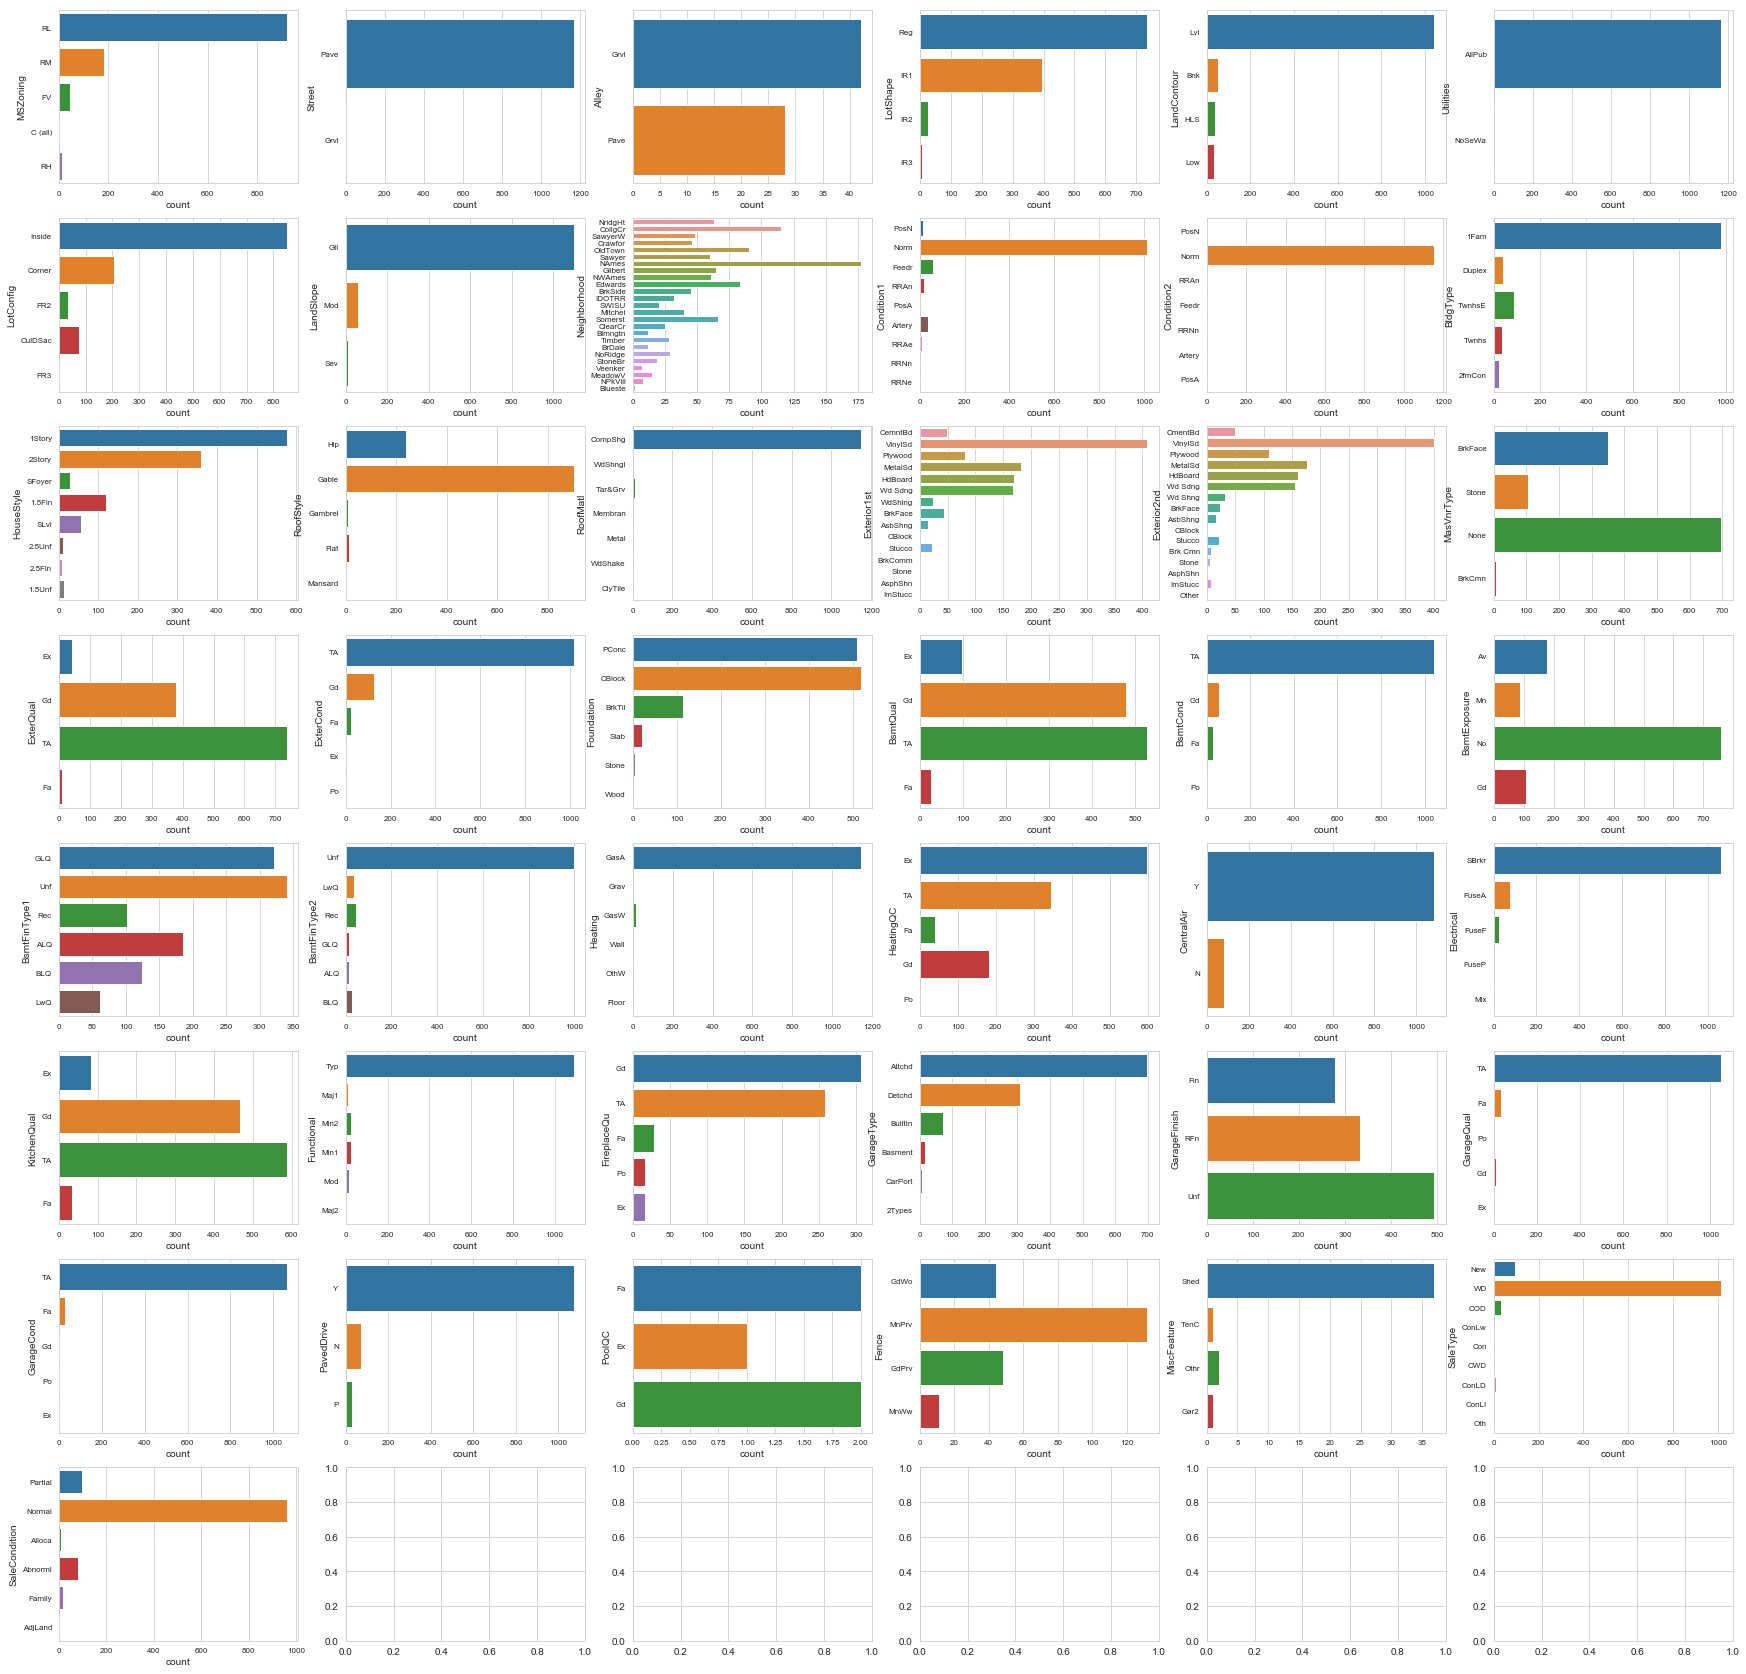

In [77]:
#call the function to plot the categorical features
features = cat_attrib.columns.values[0:]
plot_new_feature_distribution(cat_attrib,features)

In [14]:
#plotting the relationship of sale price and other variables
#sns.pairplot(train)

In [82]:
#create a table of correlations between all features and median house value
corr_matrix=strat_train_set.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

#the variables with the lowest correlations are

#BsmtFinSF2      -0.003980
#YrSold          -0.005636
#MiscVal         -0.024854
#LowQualFinSF    -0.030394
#Id              -0.030571
#BsmtHalfBath    -0.040339

SalePrice        1.000000
OverallQual      0.800531
GrLivArea        0.700908
GarageCars       0.651388
GarageArea       0.634647
TotalBsmtSF      0.604969
1stFlrSF         0.596394
FullBath         0.563145
TotRmsAbvGrd     0.534714
YearBuilt        0.528381
YearRemodAdd     0.526142
GarageYrBlt      0.493869
Fireplaces       0.462406
MasVnrArea       0.461716
LotFrontage      0.353105
BsmtFinSF1       0.351111
OpenPorchSF      0.325071
WoodDeckSF       0.312707
2ndFlrSF         0.307961
HalfBath         0.290130
LotArea          0.275339
BsmtUnfSF        0.242704
BsmtFullBath     0.231159
BedroomAbvGr     0.175717
ScreenPorch      0.127168
MoSold           0.083639
3SsnPorch        0.056172
PoolArea         0.015600
BsmtFinSF2      -0.003980
YrSold          -0.005636
MiscVal         -0.024854
LowQualFinSF    -0.030394
Id              -0.030571
BsmtHalfBath    -0.040339
OverallCond     -0.081920
MSSubClass      -0.087740
EnclosedPorch   -0.130961
KitchenAbvGr    -0.137589
Name: SalePr

In [84]:
#create a table of correlations between relevant features (corr 0.05) and median house value
corr_matrix=strat_train_set.corr()
cor_target=abs(corr_matrix['SalePrice'].sort_values(ascending=False))

relevant_features = cor_target[cor_target>0.05].index
relevant_features


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea',
       'LotFrontage', 'BsmtFinSF1', 'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF',
       'HalfBath', 'LotArea', 'BsmtUnfSF', 'BsmtFullBath', 'BedroomAbvGr',
       'ScreenPorch', 'MoSold', '3SsnPorch', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

In [112]:
class RelevantFeaturesFinder(BaseEstimator, TransformerMixin):
    def __init__(self, df,target): # no *args or **kargs
        self.df = df
        self.target=target
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        X_matrix=X.corr()
        cor_target=abs(X_matrix[target].sort_values(ascending=False))
        relevant_features = cor_target.between(0.05,1.0,inclusive=False)
        return relevant_features


In [217]:
def CorrelatedFeatureFinder(df,target,lower_limit,upper_limit):
    X_matrix=df.corr()
    cor_target=(abs(X_matrix[target].sort_values(ascending=False)))
    relevant_features = cor_target[cor_target.between(lower_limit,upper_limit,inclusive=False)].index    
    return relevant_features


In [218]:
CorrelatedFeatureFinder(strat_train_set,SalePrice,0.05,0.99)

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'LotFrontage', 'BsmtFinSF1',
       'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF', 'HalfBath', 'LotArea',
       'BsmtUnfSF', 'BsmtFullBath', 'BedroomAbvGr', 'ScreenPorch', 'MoSold',
       '3SsnPorch', 'OverallCond', 'MSSubClass', 'EnclosedPorch',
       'KitchenAbvGr'],
      dtype='object')

In [16]:
#viewing missing data in the stratified training set
strat_train_set.isnull().sum().sort_values(ascending=False).head(10)/len(train)*100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
dtype: float64

In [17]:
# view missing data in the test set
test.isnull().sum().sort_values(ascending=False).head(10)/len(test)*100

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageQual       5.346127
GarageYrBlt      5.346127
GarageFinish     5.346127
dtype: float64

In [ ]:
test['SalePrice']='None'

In [ ]:
train.drop(columns=['Id'],inplace=True)
test.drop(columns=['Id'],inplace=True)

In [166]:
# combine all data
all =train.append(test,ignore_index=True)
all.shape

(2919, 81)

In [8]:
# view missing data
all.isnull().sum().sort_values(ascending=False).head(10)/len(all)*100

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageCond       5.447071
GarageQual       5.447071
dtype: float64

In [167]:
#drop columns where more than 48% of the data is missing
all.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],inplace=True)


In [10]:
#check to make sure the columns with over 48% missing values are removed
all.isnull().sum().sort_values(ascending=False).head(10)/len(all)*100

SalePrice       49.982871
LotFrontage     16.649538
GarageQual       5.447071
GarageYrBlt      5.447071
GarageCond       5.447071
GarageFinish     5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
dtype: float64

In [13]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
all.corr('spearman')

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  \
1stFlrSF       1.000000 -0.325262   0.045745      0.117145    0.333337   
2ndFlrSF      -0.325262  1.000000  -0.030769      0.500984   -0.200660   
3SsnPorch      0.045745 -0.030769   1.000000     -0.049514    0.060979   
BedroomAbvGr   0.117145  0.500984  -0.049514      1.000000   -0.094735   
BsmtFinSF1     0.333337 -0.200660   0.060979     -0.094735    1.000000   
BsmtFinSF2     0.054144 -0.116744   0.001059     -0.019462    0.055353   
BsmtFullBath   0.253654 -0.181513   0.033081     -0.148456    0.667057   
BsmtHalfBath   0.009719 -0.065300   0.048346      0.017327    0.092598   
BsmtUnfSF      0.220145  0.049207  -0.014218      0.162715   -0.547368   
EnclosedPorch -0.130858  0.047658  -0.026846      0.001384   -0.145986   
Fireplaces     0.388710  0.160748   0.035194      0.113086    0.241007   
FullBath       0.369282  0.359323   0.019630      0.316602    0.030809   
GarageArea     0.489581  0.090176   0.018801      0.114783    0.248265   
GarageCars     0.450364  0.153011   0.017224      0.123043    0.203078   
GarageYrBlt    0.264164  0.080446   0.014309     -0.042518    0.118903   
GrLivArea      0.492163  0.604574   0.015402      0.525690    0.073816   
HalfBath      -0.145680  0.619286  -0.024217      0.284231   -0.024834   
Id            -0.012859 -0.020274  -0.044138     -0.002889   -0.019013   
KitchenAbvGr   0.094484  0.057619  -0.023739      0.185944   -0.113988   
LotArea        0.441315  0.062352   0.028611      0.293630    0.176311   
LotFrontage    0.444356 -0.002042   0.010037      0.283391    0.161309   
LowQualFinSF  -0.039526  0.030853   0.012562      0.020600   -0.082764   
MSSubClass    -0.280339  0.484969  -0.032750      0.066885   -0.103440   
MasVnrArea     0.386837  0.024942   0.024885      0.090339    0.272857   
MiscVal       -0.008910 -0.011283   0.011583      0.021553    0.020720   
MoSold         0.044757  0.013539   0.035916      0.051073   -0.007018   
OpenPorchSF    0.252030  0.203599   0.001158      0.079066    0.092164   
OverallCond   -0.187512 -0.013782   0.044216     -0.014184   -0.019715   
OverallQual    0.415785  0.242790   0.019982      0.086699    0.175055   
PoolArea       0.078886  0.023128  -0.007578      0.025555    0.030258   
SalePrice      0.575408  0.293598   0.065440      0.234907    0.301871   
ScreenPorch    0.106742 -0.008285  -0.035081     -0.001873    0.093595   
TotRmsAbvGrd   0.344834  0.554216  -0.030848      0.663443   -0.039921   
TotalBsmtSF    0.828805 -0.312129   0.042964      0.058511    0.426810   
WoodDeckSF     0.206363  0.067312  -0.003640      0.031803    0.206608   
YearBuilt      0.324812  0.022781   0.011364     -0.030463    0.214106   
YearRemodAdd   0.250486  0.089319   0.049236     -0.033566    0.088088   
YrSold        -0.019222 -0.013651   0.017068     -0.021356    0.026291   

               BsmtFinSF2  BsmtFullBath  BsmtHalfBath  BsmtUnfSF  \
1stFlrSF         0.054144      0.253654      0.009719   0.220145   
2ndFlrSF        -0.116744     -0.181513     -0.065300   0.049207   
3SsnPorch        0.001059      0.033081      0.048346  -0.014218   
BedroomAbvGr    -0.019462     -0.148456      0.017327   0.162715   
BsmtFinSF1       0.055353      0.667057      0.092598  -0.547368   
BsmtFinSF2       1.000000      0.163432      0.134195  -0.296526   
BsmtFullBath     0.163432      1.000000     -0.154387  -0.418255   
BsmtHalfBath     0.134195     -0.154387      1.000000  -0.104707   
BsmtUnfSF       -0.296526     -0.418255     -0.104707   1.000000   
EnclosedPorch    0.028851     -0.091591     -0.017372   0.034453   
Fireplaces       0.034586      0.155478      0.034409   0.022562   
FullBath        -0.104511     -0.024794     -0.047100   0.240589   
GarageArea      -0.012619      0.196314     -0.025313   0.106106   
GarageCars      -0.060531      0.161620     -0.040504   0.140332   
GarageYrBlt     -0.141270      0.130321     -0.081824   0.178197   
GrLivArea       -0.077038      0.031776 

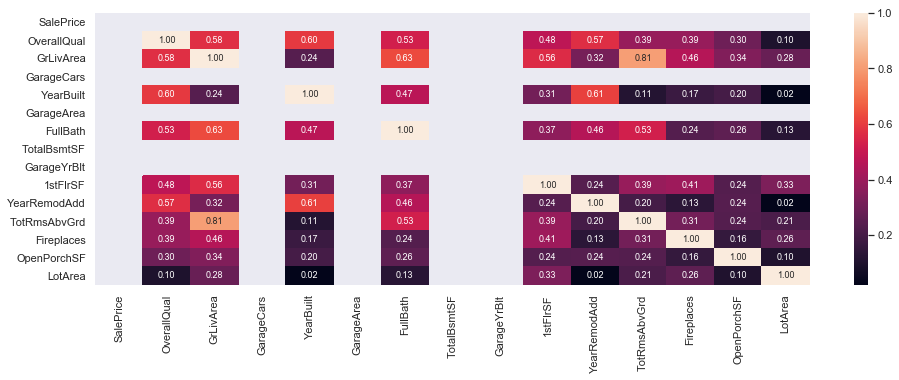

In [28]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(16,5))
cols = all.corr('spearman').nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(all[cols].values.T)
sns.set(font_scale=1.)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [27]:
#lets look at the variables with the highest correlation to saleprice
all.corr('spearman').nlargest(k, 'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
GarageCars      0.690711
YearBuilt       0.652682
GarageArea      0.649379
FullBath        0.635957
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
TotRmsAbvGrd    0.532586
Fireplaces      0.519247
OpenPorchSF     0.477561
LotArea         0.456461
Name: SalePrice, dtype: float64

In [29]:
#lets make sure the variables with highest correlation to saleprice are store in the variable cols
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt',
       'GarageArea', 'FullBath', 'TotalBsmtSF', 'GarageYrBlt', '1stFlrSF',
       'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces', 'OpenPorchSF', 'LotArea'],
      dtype='object')

In [58]:
#Lets look at the number of missing values for the variables with the highest correlation to SalePrice
all[cols].isnull().sum()

SalePrice       1459
OverallQual        0
GrLivArea          0
GarageCars         1
YearBuilt          0
GarageArea         1
FullBath           0
TotalBsmtSF        1
GarageYrBlt      159
1stFlrSF           0
YearRemodAdd       0
TotRmsAbvGrd       0
Fireplaces         0
OpenPorchSF        0
LotArea            0
dtype: int64

In [170]:
#lets inspect the relationship between year build and GarageYrBlt
all[all['YearBuilt']!=all['GarageYrBlt']].head()

# the result is that they are not the same

Empty DataFrame
Columns: [1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BldgType, BsmtCond, BsmtExposure, BsmtFinSF1, BsmtFinSF2, BsmtFinType1, BsmtFinType2, BsmtFullBath, BsmtHalfBath, BsmtQual, BsmtUnfSF, CentralAir, Condition1, Condition2, Electrical, EnclosedPorch, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fireplaces, Foundation, FullBath, Functional, GarageArea, GarageCars, GarageCond, GarageFinish, GarageQual, GarageType, GarageYrBlt, GrLivArea, HalfBath, Heating, HeatingQC, HouseStyle, Id, KitchenAbvGr, KitchenQual, LandContour, LandSlope, LotArea, LotConfig, LotFrontage, LotShape, LowQualFinSF, MSSubClass, MSZoning, MasVnrArea, MasVnrType, MiscVal, MoSold, Neighborhood, OpenPorchSF, OverallCond, OverallQual, PavedDrive, PoolArea, RoofMatl, RoofStyle, SaleCondition, SalePrice, SaleType, ScreenPorch, Street, TotRmsAbvGrd, TotalBsmtSF, Utilities, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold]
Index: []

In [77]:
q= all[all.GarageYrBlt.isnull()]
q.sort_values(by='YearBuilt',ascending =True)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
1349       938      1215          0  Pave             4     1Fam       Fa   
1137       780       240          0   NaN             2     1Fam       TA   
636        684       396          0  Grvl             3     1Fam       TA   
962       1000       544          0   NaN             3     1Fam       TA   
1119      1034       957          0   NaN             4   2fmCon       TA   
966        751       783          0  Grvl             3     1Fam       TA   
520        694       600          0  Grvl             3   2fmCon      NaN   
921       1272       928          0   NaN             4   Duplex       TA   
362        797         0          0   NaN             2     1Fam       TA   
374        978       886          0   NaN             6   2fmCon       Fa   
644        884       656          0  Grvl             3     1Fam       TA   
98         942       942          0   NaN             4     1Fam       TA   
386        658       526          0   NaN             5     1Fam       TA   
79        1128      1128          0   NaN             4   2fmCon       TA   
638        796         0          0   NaN             2     1Fam       TA   
535        820       527          0   NaN             3   2fmCon       TA   
750        792       348          0  Grvl             3     1Fam       Fa   
630        828       658          0  Grvl             3   2fmCon       TA   
348        764       700          0   NaN             3     1Fam       TA   
351        801       646          0  Grvl             3     1Fam       TA   
968        600       368          0   NaN             2     1Fam       TA   
666       1242       742          0  Grvl             5   2fmCon       TA   
359        816         0          0   NaN             2     1Fam       TA   
1234      1024       940          0   NaN             4     1Fam       TA   
291        936       780          0  Grvl             6   2fmCon       Fa   
92         780       780          0  Grvl             3     1Fam       TA   
198        929       929          0   NaN             5     1Fam       TA   
635       1440      1440          0  Pave             8   2fmCon       Fa   
620        864         0          0  Grvl             2     1Fam       TA   
1096       773       582          0   NaN             3     1Fam       TA   
784        742       742          0  Grvl             3     1Fam       TA   
96        1212       180          0   NaN             3   2fmCon       TA   
88        1013         0          0   NaN             2     1Fam       Fa   
675        808       536          0  Grvl             3   2fmCon       Fa   
1433       576       360          0   NaN             2     1Fam       Fa   
1030       948       980          0   NaN             5   2fmCon       TA   
1331      1020         0          0   NaN             2     1Fam       Fa   
1339       819         0          0   NaN             2     1Fam       TA   
108        997       520          0   NaN             3     1Fam       TA   
48         736       716          0   NaN             2   2fmCon       TA   
633       1027         0          0   NaN             2     1Fam       TA   
350       1101       600          0   NaN             4   2fmCon       Po   
1329       624       624          0   NaN             2   Duplex       TA   
528        605         0          0   NaN             2     1Fam       TA   
495        720         0          0   NaN             2     1Fam       TA   
307       1035       371          0  Grvl             3     1Fam       TA   
71         936         0          0  Grvl             2     1Fam       TA   
431       1088       110          0   NaN             4     1Fam       TA   
1257       864         0          0   NaN             2     1Fam       TA   
1325       796         0          0   NaN             2     1Fam       Fa   
375        904         0          0   NaN             1     1Fam       Po   
37

In [169]:
all.loc[(all['YearBuilt']>= 1980 & all.GarageYrBlt.isnull()), 'GarageYrBlt'] = all['YearBuilt']


                              

In [165]:
all[all['YearBuilt']<1980]

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr BldgType BsmtCond  \
1         1262         0          0             3     1Fam       TA   
3          961       756          0             3     1Fam       Gd   
7         1107       983          0             3     1Fam       TA   
8         1022       752          0             2     1Fam       TA   
9         1077         0          0             2   2fmCon       TA   
10        1040         0          0             3     1Fam       TA   
12         912         0          0             2     1Fam       TA   
14        1253         0          0             2     1Fam       TA   
15         854         0          0             2     1Fam       TA   
16        1004         0          0             2     1Fam       TA   
17        1296         0          0             2   Duplex      NaN   
19        1339         0          0             3     1Fam       TA   
21        1108         0          0             3     1Fam       TA   
23        1060         0          0             3   TwnhsE       TA   
24        1060         0          0             3     1Fam       TA   
26         900         0          0             3     1Fam       TA   
28        1600         0          0             2     1Fam       TA   
29         520         0          0             1     1Fam       TA   
30         649       668          0             3     1Fam       TA   
31        1228         0          0             3     1Fam       TA   
33        1700         0          0             4     1Fam       TA   
37        1297         0          0             3     1Fam       TA   
38        1057         0          0             3     1Fam       TA   
39        1152         0          0             2   Duplex      NaN   
40        1324         0          0             3     1Fam       TA   
41        1328         0          0             2     1Fam       TA   
43         938         0          0             3     1Fam       TA   
44        1150         0          0             3     1Fam       TA   
48         736       716          0             2   2fmCon       TA   
49         955         0          0             3     1Fam       TA   
51         816         0          0             3     1Fam       TA   
52         816         0          0             2   Duplex       TA   
54        1360         0          0             3     1Fam       TA   
55        1425         0        407             3     1Fam       TA   
59         780         0          0             2     1Fam       TA   
61         581       530          0             3     1Fam       Fa   
63         902       808          0             3     1Fam       TA   
66        2207         0          0             3     1Fam       TA   
68         747         0          0             2     1Fam       TA   
69        1304       983          0             3     1Fam       TA   
70        2223         0          0             3     1Fam       TA   
73        1086         0          0             3     1Fam       TA   
74         840       765          0             3     1Fam       TA   
75         526       462          0             2    Twnhs       TA   
76         952         0          0             2     1Fam       TA   
77        1072       213          0             2     1Fam       TA   
78        1768         0          0             4   Duplex       TA   
79         682       548          0             2     1Fam       TA   
80        1182       960          0             4     1Fam       TA   
83        1065         0          0             3     1Fam       TA   
88        1013         0          0             2     1Fam       Fa   
90        1040         0          0             2     1Fam      NaN   
91        1235         0          0             2     1Fam       TA   
92         964         0          0             2     1Fam       TA   
93        1260      1031          0             4   2fmCon       Fa   
97         960         0      

In [161]:
all.GarageYrBlt.isnull().sum()

0

In [172]:
all[cols].isnull().sum()

SalePrice       1459
OverallQual        0
GrLivArea          0
GarageCars         1
YearBuilt          0
GarageArea         1
FullBath           0
TotalBsmtSF        1
GarageYrBlt        0
1stFlrSF           0
YearRemodAdd       0
TotRmsAbvGrd       0
Fireplaces         0
OpenPorchSF        0
LotArea            0
dtype: int64

In [34]:
df_train= train[cols]
df_train.head()

SalePrice  OverallQual  GrLivArea  GarageCars  YearBuilt  GarageArea  \
0     208500            7       1710           2       2003         548   
1     181500            6       1262           2       1976         460   
2     223500            7       1786           2       2001         608   
3     140000            7       1717           3       1915         642   
4     250000            8       2198           3       2000         836   

   FullBath  TotalBsmtSF  GarageYrBlt  1stFlrSF  YearRemodAdd  TotRmsAbvGrd  \
0         2          856       2003.0       856          2003             8   
1         2         1262       1976.0      1262          1976             6   
2         2          920       2001.0       920          2002             6   
3         1          756       1998.0       961          1970             7   
4         2         1145       2000.0      1145          2000             9   

   Fireplaces  OpenPorchSF  LotArea  
0           0           61     8450  
1           1            0     9600  
2           1           42    11250  
3           1           35     9550  
4           1           84    14260

In [35]:
# Lets scale the price variable since the ranges are so high
df_train['LogSalePrice']=np.log(df_train['SalePrice'])

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
#view the dataset after saleprice has been scaled using the log function
df_train.head()

SalePrice  OverallQual  GrLivArea  GarageCars  YearBuilt  GarageArea  \
0     208500            7       1710           2       2003         548   
1     181500            6       1262           2       1976         460   
2     223500            7       1786           2       2001         608   
3     140000            7       1717           3       1915         642   
4     250000            8       2198           3       2000         836   

   FullBath  TotalBsmtSF  GarageYrBlt  1stFlrSF  YearRemodAdd  TotRmsAbvGrd  \
0         2          856       2003.0       856          2003             8   
1         2         1262       1976.0      1262          1976             6   
2         2          920       2001.0       920          2002             6   
3         1          756       1998.0       961          1970             7   
4         2         1145       2000.0      1145          2000             9   

   Fireplaces  OpenPorchSF  LotArea  LogSalePrice  
0           0           61     8450     12.247694  
1           1            0     9600     12.109011  
2           1           42    11250     12.317167  
3           1           35     9550     11.849398  
4           1           84    14260     12.429216

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


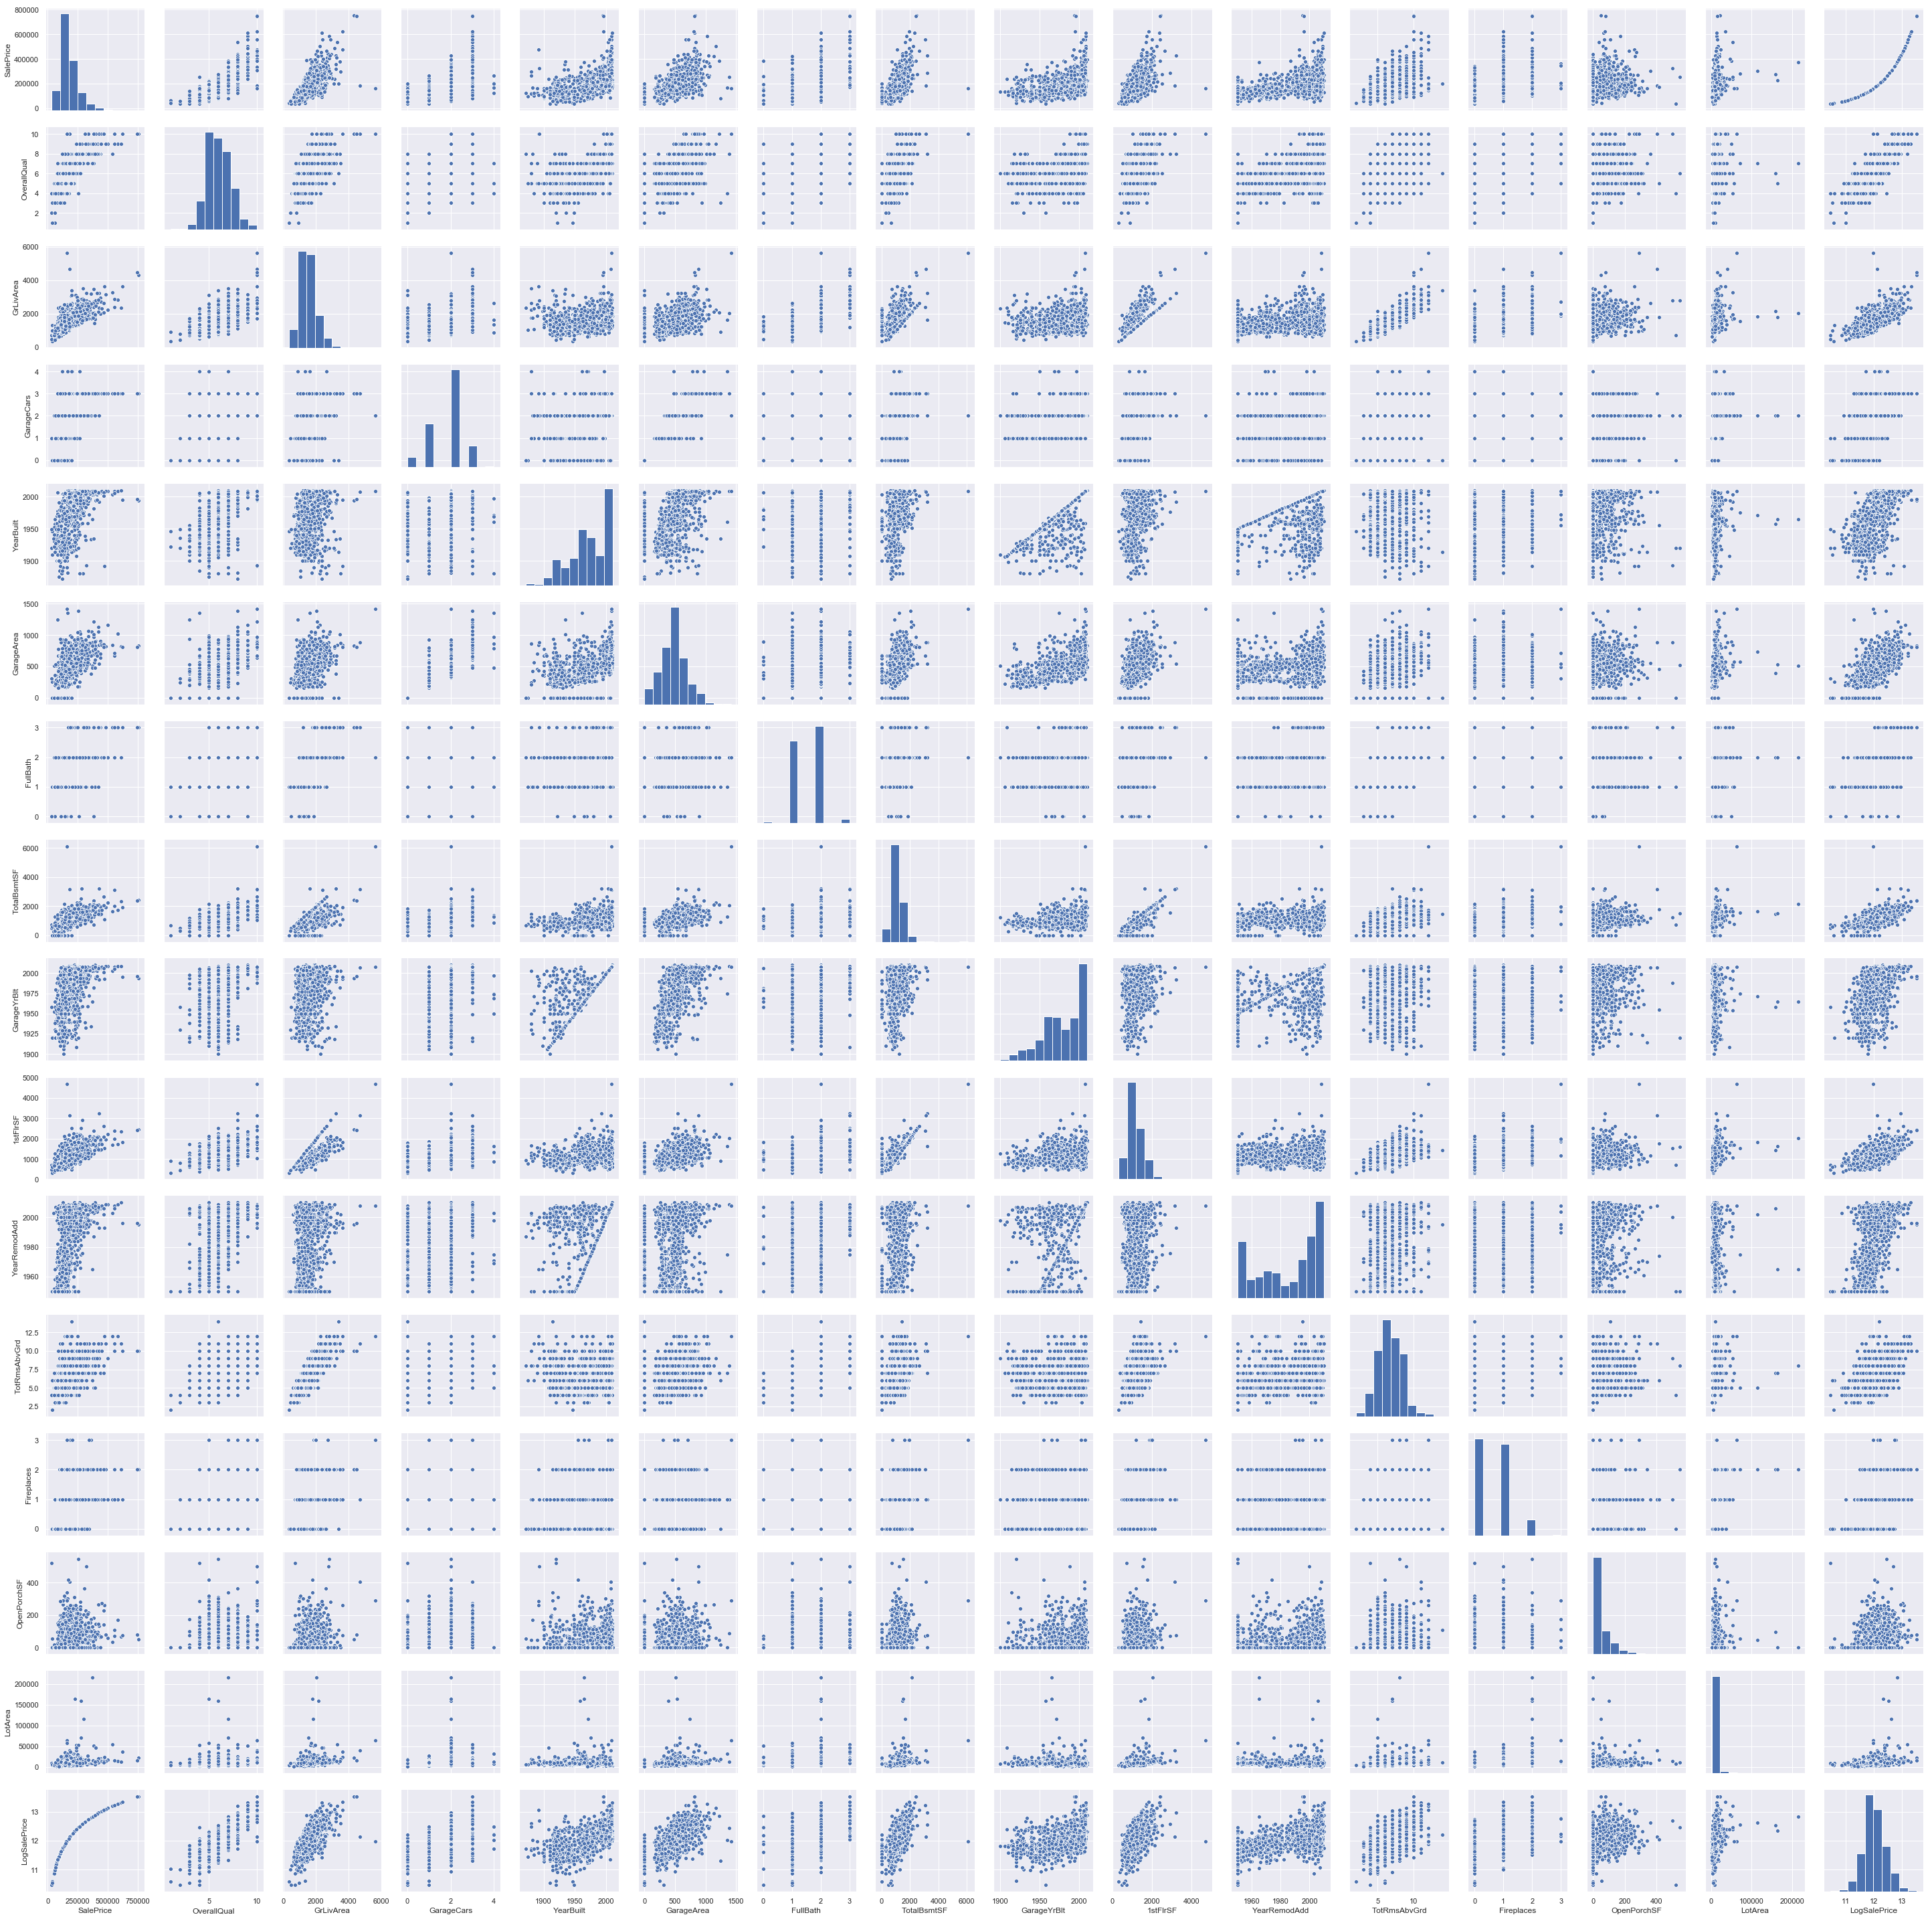

In [38]:
#lets plot the variables to look close at them

sns.pairplot(df_train)

## Linear regression to predict overall score

In [39]:
#assumptions of linear regression
# all variables are continuous and not categorical
# data is free of missing values
# there is a linear relationship between predictors and predictants
# all predictors of independent of each other
# residuals/predictor errors are normally distributed

In [41]:
# all variables are continuous and not categorical
df_train.dtypes

SalePrice         int64
OverallQual       int64
GrLivArea         int64
GarageCars        int64
YearBuilt         int64
GarageArea        int64
FullBath          int64
TotalBsmtSF       int64
GarageYrBlt     float64
1stFlrSF          int64
YearRemodAdd      int64
TotRmsAbvGrd      int64
Fireplaces        int64
OpenPorchSF       int64
LotArea           int64
LogSalePrice    float64
dtype: object

In [40]:
# data is free of missing values
df_train.isnull().sum()/len(df_train)* 100

#GarageYrBlt     5.547945 has 5% of the data missing

SalePrice       0.000000
OverallQual     0.000000
GrLivArea       0.000000
GarageCars      0.000000
YearBuilt       0.000000
GarageArea      0.000000
FullBath        0.000000
TotalBsmtSF     0.000000
GarageYrBlt     5.547945
1stFlrSF        0.000000
YearRemodAdd    0.000000
TotRmsAbvGrd    0.000000
Fireplaces      0.000000
OpenPorchSF     0.000000
LotArea         0.000000
LogSalePrice    0.000000
dtype: float64